# Day 11 - Circular - J. Hariharan
Circular<br>Jayaram Hariharan<br>April 11, 2023

## Instructions for using this template

> Make sure you have copied the template subdirectory and named it with your prompt's date, prompt's name and your name (e.g., `/01_part-to-whole_cnell`) before editing this document!

1. Put all comments either in markdown text (like this) or in the `Python` cells to explain your process to Vizlab reviewers
2. Put all Python code in the Python cells within each section. The sections are organized for you to (in order): do some set-up steps (import packages), load in any data (manually or with built in packages), process your data for plotting, create a plot using matplotlib, and finally compose the final twitter image.
3. You can run individual code chunks while developing code and plots.
4. Make sure to save your output `png` in the `out/` folder, named with the date of the prompt that you've been assigned to, the prompt, and your name (e.g., `20230101_part-to-whole_cnell.png`).
5. When you're happy with the final plot, fill out the supporting information at the bottom and push to gitlab for review. Note: only commit input data if it can't be downloaded directly with code.

## Set up
Import packages here

In [1]:
# Import required packages for data loading/analysis
import geopandas as gpd
from shapely import Point
from shapely.geometry import Polygon
import numpy as np

# Import required packages for plotting and plot composition
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib.gridspec import GridSpec
from matplotlib import patches

## Load files

Save any files that you are using directly in the `in` folder. Then read them in to the environment with this chunk of code. Remember, use relative file pathways, and never include any personal computer file pathways.

This is also a good place to load any data from other built-in packages or pulled with an API.

In [2]:
# load in data
gdf = gpd.read_file("in/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp")

## Get data ready for plotting
  
This next section is for doing any pre-processing steps, data joins, etc, to get your data ready for plotting.

In [3]:
# process data
# filter to only include lakes in the US
us_gdf = gdf[gdf["Country"] == "United States of America"]
# calculate circularity of each lake
us_gdf["circularity"] = (4*np.pi*us_gdf["Lake_area"]) / (us_gdf["Shore_len"]**2)

/Users/jhariharan/mambaforge/envs/chartmaking/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [4]:
us_gdf.columns

Index(['Hylak_id', 'Lake_name', 'Country', 'Continent', 'Poly_src',
       'Lake_type', 'Grand_id', 'Lake_area', 'Shore_len', 'Shore_dev',
       'Vol_total', 'Vol_res', 'Vol_src', 'Depth_avg', 'Dis_avg', 'Res_time',
       'Elevation', 'Slope_100', 'Wshd_area', 'Pour_long', 'Pour_lat',
       'geometry', 'circularity'],
      dtype='object')

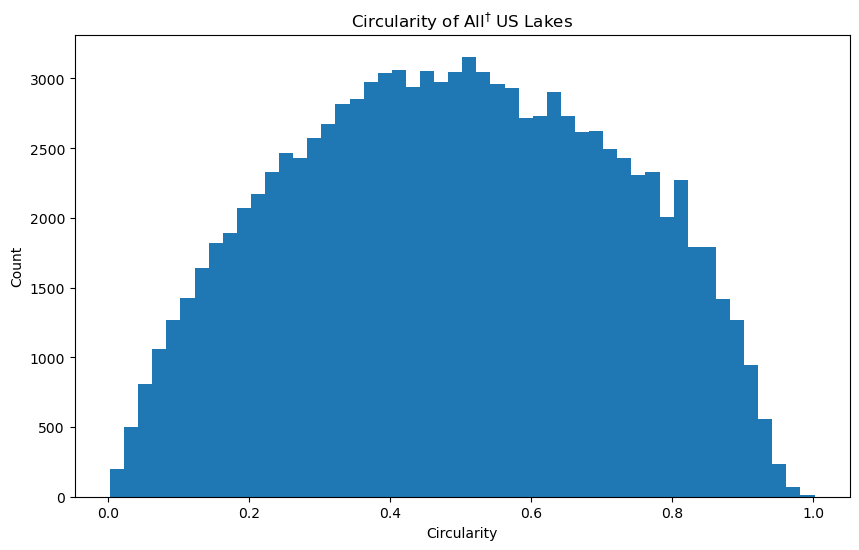

In [5]:
# plot histogram of circularity of US lakes
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(us_gdf["circularity"], bins=50)
ax.set_xlabel("Circularity")
ax.set_ylabel("Count")
ax.set_title("Circularity of All$^{\dagger}$ US Lakes")
plt.show()

In [6]:
# filter out nan lake names
us_gdf = us_gdf[~us_gdf["Lake_name"].isna()]

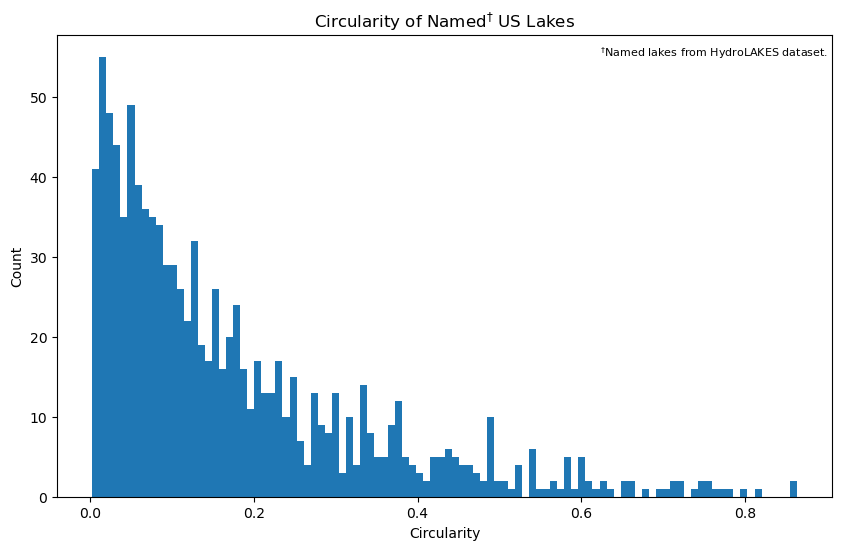

In [7]:
# plot histogram of circularity of US lakes
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(us_gdf["circularity"], bins=100)
ax.set_xlabel("Circularity")
ax.set_ylabel("Count")
ax.set_title("Circularity of Named$^{\dagger}$ US Lakes")
ax.text(0.7, 0.98, "$^{\dagger}$Named lakes from HydroLAKES dataset.",
        transform=ax.transAxes, fontsize=8, verticalalignment='top')
plt.show()

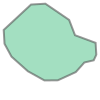

In [8]:
# visualize most circular lake
# get the index of the most circular lake
most_circular_idx = us_gdf["circularity"].idxmax()
# get the geometry of the most circular lake
most_circular_geom = us_gdf.loc[most_circular_idx, "geometry"]
# get the circularity of the most circular lake
most_circular_circ = us_gdf.loc[most_circular_idx, "circularity"]
# get the name of the most circular lake
most_circular_name = us_gdf.loc[most_circular_idx, "Lake_name"]
# plot the lake
most_circular_geom

In [32]:
us_gdf.iloc[10, :]

Hylak_id                                                      65
Lake_name                                                   Oahe
Country                                 United States of America
Continent                                          North America
Poly_src                                                    SWBD
Lake_type                                                      2
Grand_id                                                     870
Lake_area                                                1092.54
Shore_len                                                1675.27
Shore_dev                                                   14.3
Vol_total                                                29110.0
Vol_res                                                  29110.0
Vol_src                                                        2
Depth_avg                                                   26.6
Dis_avg                                                  965.451
Res_time                 

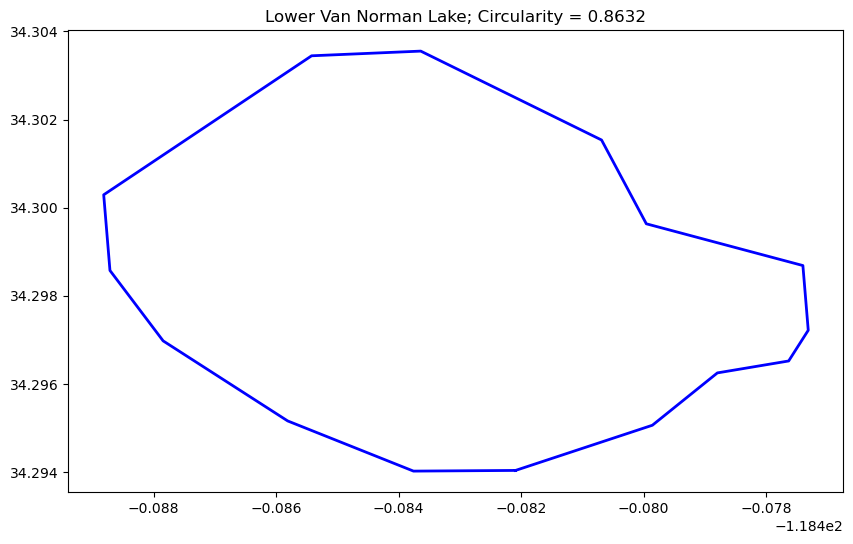

In [9]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = most_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{most_circular_name}" + f"; Circularity = {most_circular_circ:.4f}")
plt.show()

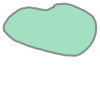

In [10]:
# second most circular lake
# get the index of the second most circular lake
second_most_circular_idx = us_gdf["circularity"].sort_values(ascending=False).index[1]
# get the geometry of the second most circular lake
second_most_circular_geom = us_gdf.loc[second_most_circular_idx, "geometry"]
# get the circularity of the second most circular lake
second_most_circular_circ = us_gdf.loc[second_most_circular_idx, "circularity"]
# get the name of the second most circular lake
second_most_circular_name = us_gdf.loc[second_most_circular_idx, "Lake_name"]
# plot the lake
second_most_circular_geom

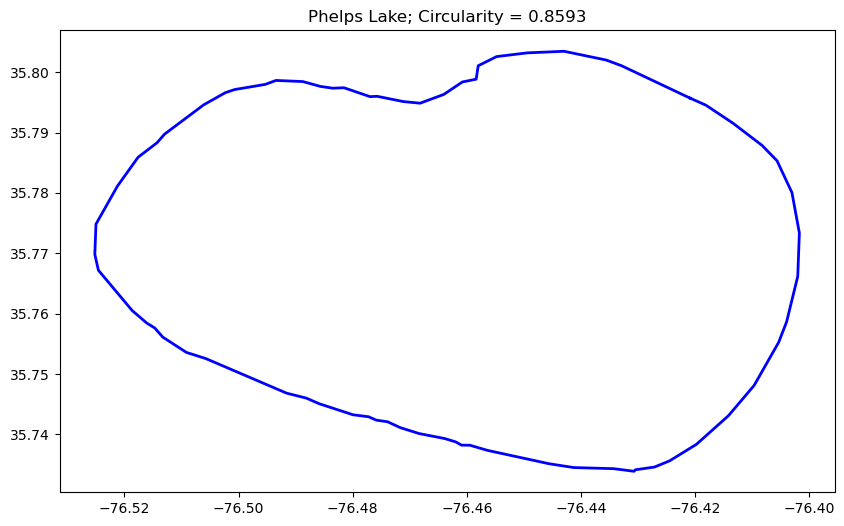

In [11]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = second_most_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{second_most_circular_name}" + f"; Circularity = {second_most_circular_circ:.4f}")
plt.show()

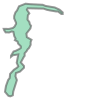

In [12]:
# median circular lake
# get the index of the median circular lake
median_circular_idx = us_gdf["circularity"].sort_values().index[len(us_gdf)//2]
# get the geometry of the median circular lake
median_circular_geom = us_gdf.loc[median_circular_idx, "geometry"]
# get the circularity of the median circular lake
median_circular_circ = us_gdf.loc[median_circular_idx, "circularity"]
# get the name of the median circular lake
median_circular_name = us_gdf.loc[median_circular_idx, "Lake_name"]
# plot the lake
median_circular_geom

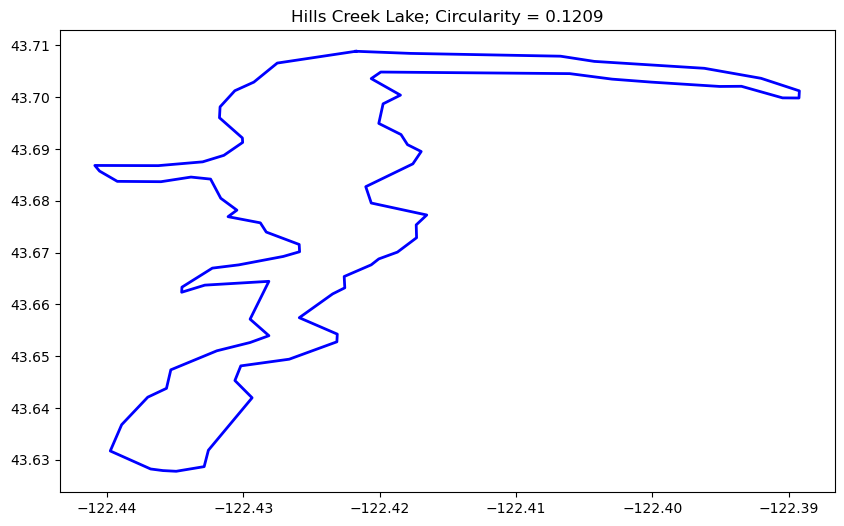

In [13]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = median_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{median_circular_name}" + f"; Circularity = {median_circular_circ:.4f}")
plt.show()

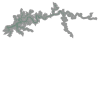

In [14]:
# visualize the least circular lake
# get the index of the least circular lake
least_circular_idx = us_gdf["circularity"].idxmin()
# get the geometry of the least circular lake
least_circular_geom = us_gdf.loc[least_circular_idx, "geometry"]
# get the circularity of the least circular lake
least_circular_circ = us_gdf.loc[least_circular_idx, "circularity"]
# get the name of the least circular lake
least_circular_name = us_gdf.loc[least_circular_idx, "Lake_name"]
# plot the lake
least_circular_geom

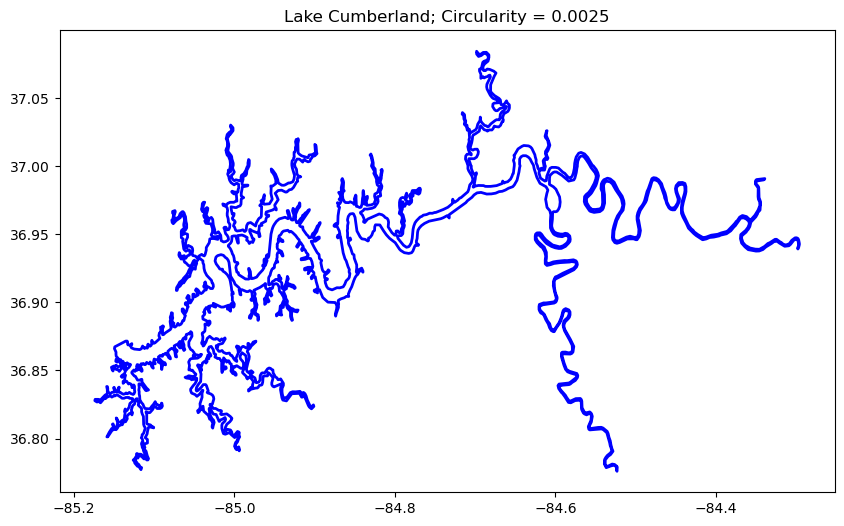

In [15]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = least_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{least_circular_name}" + f"; Circularity = {least_circular_circ:.4f}")
plt.show()

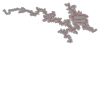

In [16]:
# second least circular lake
# get the index of the second least circular lake
second_least_circular_idx = us_gdf["circularity"].sort_values().index[1]
# get the geometry of the second least circular lake
second_least_circular_geom = us_gdf.loc[second_least_circular_idx, "geometry"]
# get the circularity of the second least circular lake
second_least_circular_circ = us_gdf.loc[second_least_circular_idx, "circularity"]
# get the name of the second least circular lake
second_least_circular_name = us_gdf.loc[second_least_circular_idx, "Lake_name"]
# plot the lake
second_least_circular_geom

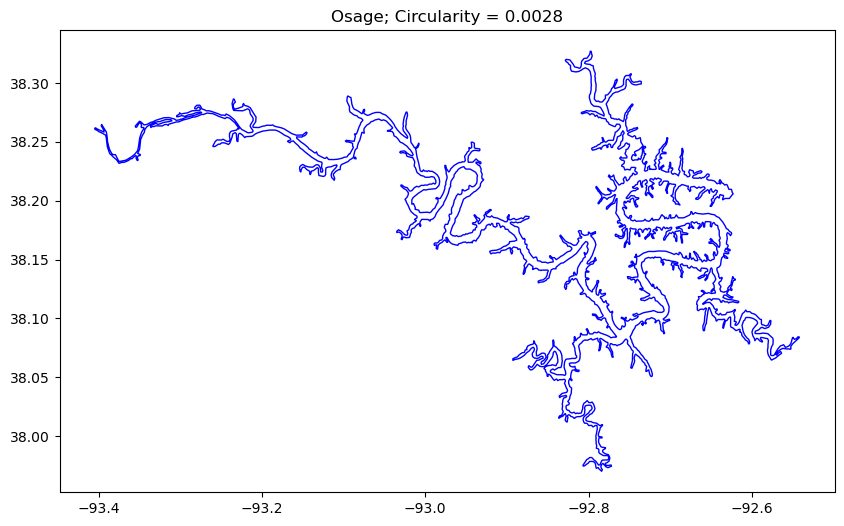

In [17]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = second_least_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=1)
# add the name of the lake
ax.set_title(f"{second_least_circular_name}" + f"; Circularity = {second_least_circular_circ:.4f}")
plt.show()

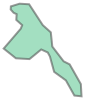

In [18]:
# lake with circularity close to 0.3
# get the index
idx03 = us_gdf["circularity"].sub(0.3).abs().idxmin()
# get the geometry
geom03 = us_gdf.loc[idx03, "geometry"]
# get the circularity
circ03 = us_gdf.loc[idx03, "circularity"]
# get the name
name03 = us_gdf.loc[idx03, "Lake_name"]
# plot the lake
geom03

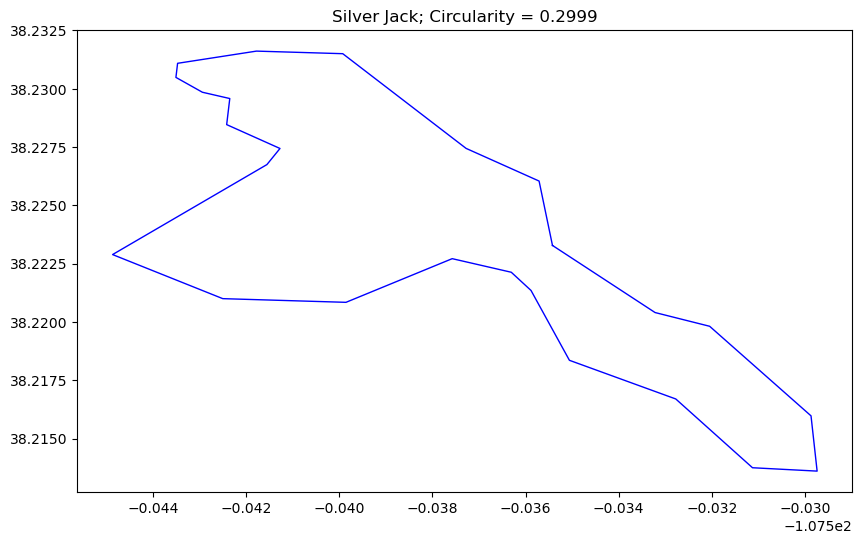

In [19]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = geom03.exterior.xy
ax.plot(x, y, color="blue", linewidth=1)
# add the name of the lake
ax.set_title(f"{name03}" + f"; Circularity = {circ03:.4f}")
plt.show()

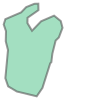

In [20]:
# lake with circularity close to 0.5
# get the index
idx05 = us_gdf["circularity"].sub(0.5).abs().idxmin()
# get the geometry
geom05 = us_gdf.loc[idx05, "geometry"]
# get the circularity
circ05 = us_gdf.loc[idx05, "circularity"]
# get the name
name05 = us_gdf.loc[idx05, "Lake_name"]
# plot the lake
geom05

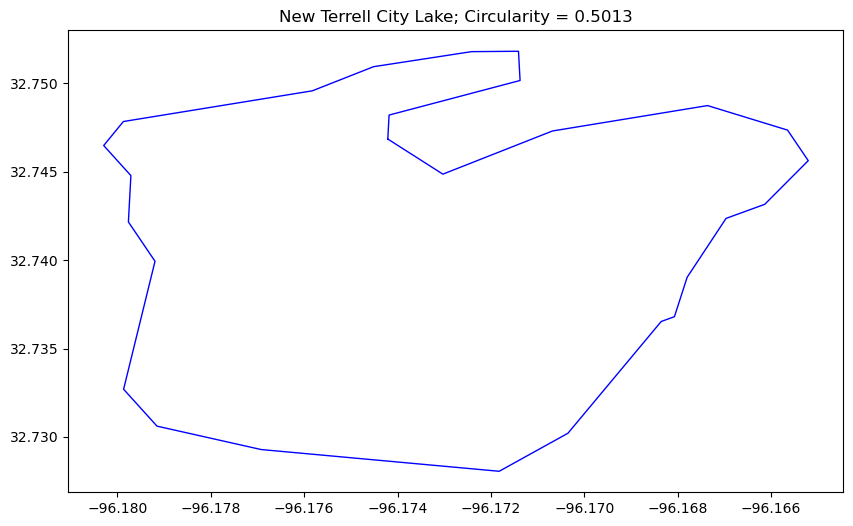

In [21]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = geom05.exterior.xy
ax.plot(x, y, color="blue", linewidth=1)
# add the name of the lake
ax.set_title(f"{name05}" + f"; Circularity = {circ05:.4f}")
plt.show()

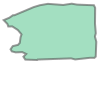

In [22]:
# lake with circularity close to 0.7
# get the index
idx07 = us_gdf["circularity"].sub(0.7).abs().idxmin()
# get the geometry
geom07 = us_gdf.loc[idx07, "geometry"]
# get the circularity
circ07 = us_gdf.loc[idx07, "circularity"]
# get the name
name07 = us_gdf.loc[idx07, "Lake_name"]
# plot the lake
geom07

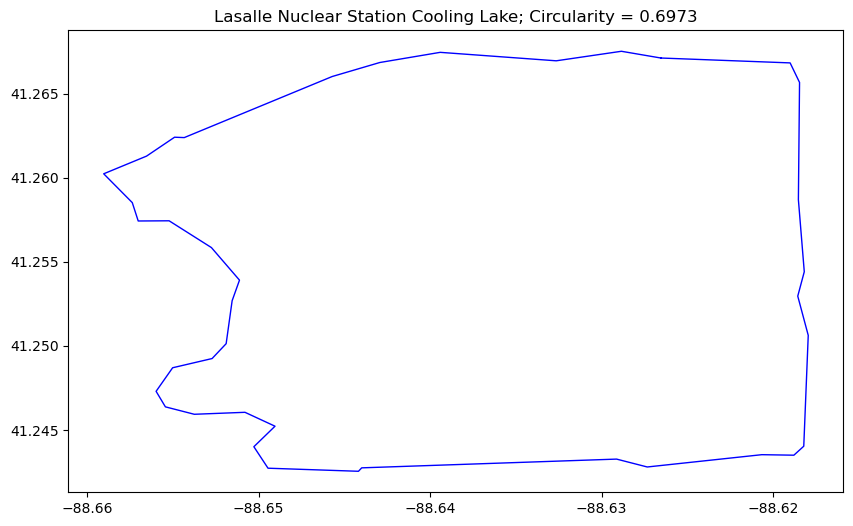

In [23]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = geom07.exterior.xy
ax.plot(x, y, color="blue", linewidth=1)
# add the name of the lake
ax.set_title(f"{name07}" + f"; Circularity = {circ07:.4f}")
plt.show()

In [34]:
# write out these lakes as a shapefile
# create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    {
        "Lake_name": [least_circular_name, median_circular_name, name03, name05, name07, most_circular_name],
        "circularity": [least_circular_circ, median_circular_circ, circ03, circ05, circ07, most_circular_circ],
        "geometry": [least_circular_geom, median_circular_geom, geom03, geom05, geom07, most_circular_geom],
    },
    crs=us_gdf.crs
)
# write out the shapefile
gdf.to_file("us_lakes_circularity.shp")

/var/folders/yt/_7rjht2s6h55bw07r9br7h6jv98z26/T/ipykernel_23373/1865639857.py:12: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("us_lakes_circularity.shp")


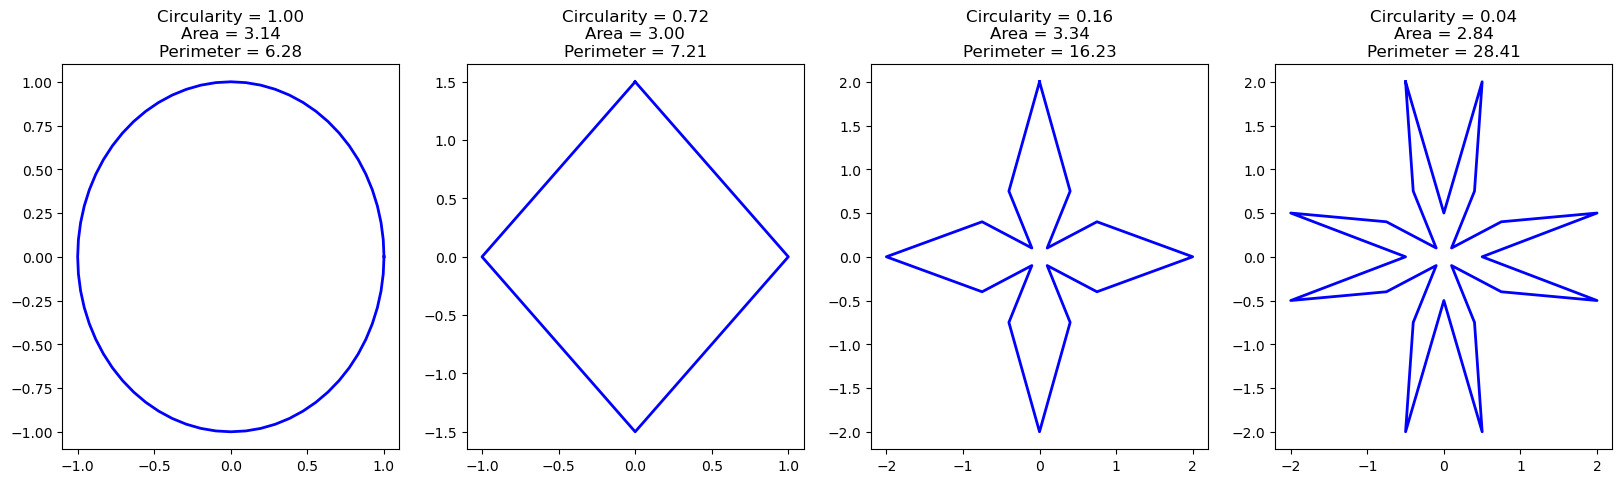

In [24]:
# define the shapes
circle = Point(0, 0).buffer(1)
diamond = Polygon([(0, 1.5), (0.5, 0.75), (1, 0.0), (0.5, -0.75), (0, -1.5), (-0.5, -0.75), (-1, 0.0), (-0.5, 0.75)])
cross = Polygon([(0, 2.0), (0.4, 0.75), (0.1, 0.1), (0.75, 0.4), (2, 0.0), (0.75, -0.4), (0.1, -0.1), (0.4, -0.75), (0, -2), (-0.4, -0.75), (-0.1, -0.1), (-0.75, -0.4), (-2, 0.0), (-0.75, 0.4), (-0.1, 0.1), (-0.4, 0.75)])
complex = Polygon([(-0.5, 2.0), (0.0, 0.5), (0.5, 2.0), (0.4, 0.75), (0.1, 0.1), (0.75, 0.4), (2, 0.5), (0.5, 0.0), (2, -0.5), (0.75, -0.4), (0.1, -0.1), (0.4, -0.75), (0.5, -2), (0, -0.5), (-0.5, -2), (-0.4, -0.75), (-0.1, -0.1), (-0.75, -0.4), (-2, -0.5), (-0.5, 0.0), (-2, 0.5), (-0.75, 0.4), (-0.1, 0.1), (-0.4, 0.75)])
# plot the shapes
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# plot the circle
x, y = circle.exterior.xy
ax[0].plot(x, y, color="blue", linewidth=2)
ax[0].set_title(f"Circularity = 1.00\nArea = {circle.area:.2f}\nPerimeter = {circle.length:.2f}")
# plot the cross
x, y = diamond.exterior.xy
ax[1].plot(x, y, color="blue", linewidth=2)
diamond_circularity = 4 * np.pi * diamond.area / diamond.length**2
ax[1].set_title(f"Circularity = {diamond_circularity:.2f}\nArea = {diamond.area:.2f}\nPerimeter = {diamond.length:.2f}")
# plot the cross
x, y = cross.exterior.xy
ax[2].plot(x, y, color="blue", linewidth=2)
cross_circularity = 4 * np.pi * cross.area / cross.length**2
ax[2].set_title(f"Circularity = {cross_circularity:.2f}\nArea = {cross.area:.2f}\nPerimeter = {cross.length:.2f}")
# plot the complex shape
x, y = complex.exterior.xy
ax[3].plot(x, y, color="blue", linewidth=2)
complex_circularity = 4 * np.pi * complex.area / complex.length**2
ax[3].set_title(f"Circularity = {complex_circularity:.2f}\nArea = {complex.area:.2f}\nPerimeter = {complex.length:.2f}")
plt.show()

In [25]:
logo_color = 'black' # 'black' or 'white'
logo = image.imread(f'../usgs_logo_{logo_color}.png')

## Set up main plot

This chunk is where the main `matplotlib` set-up occurs.

#### Figure set-up

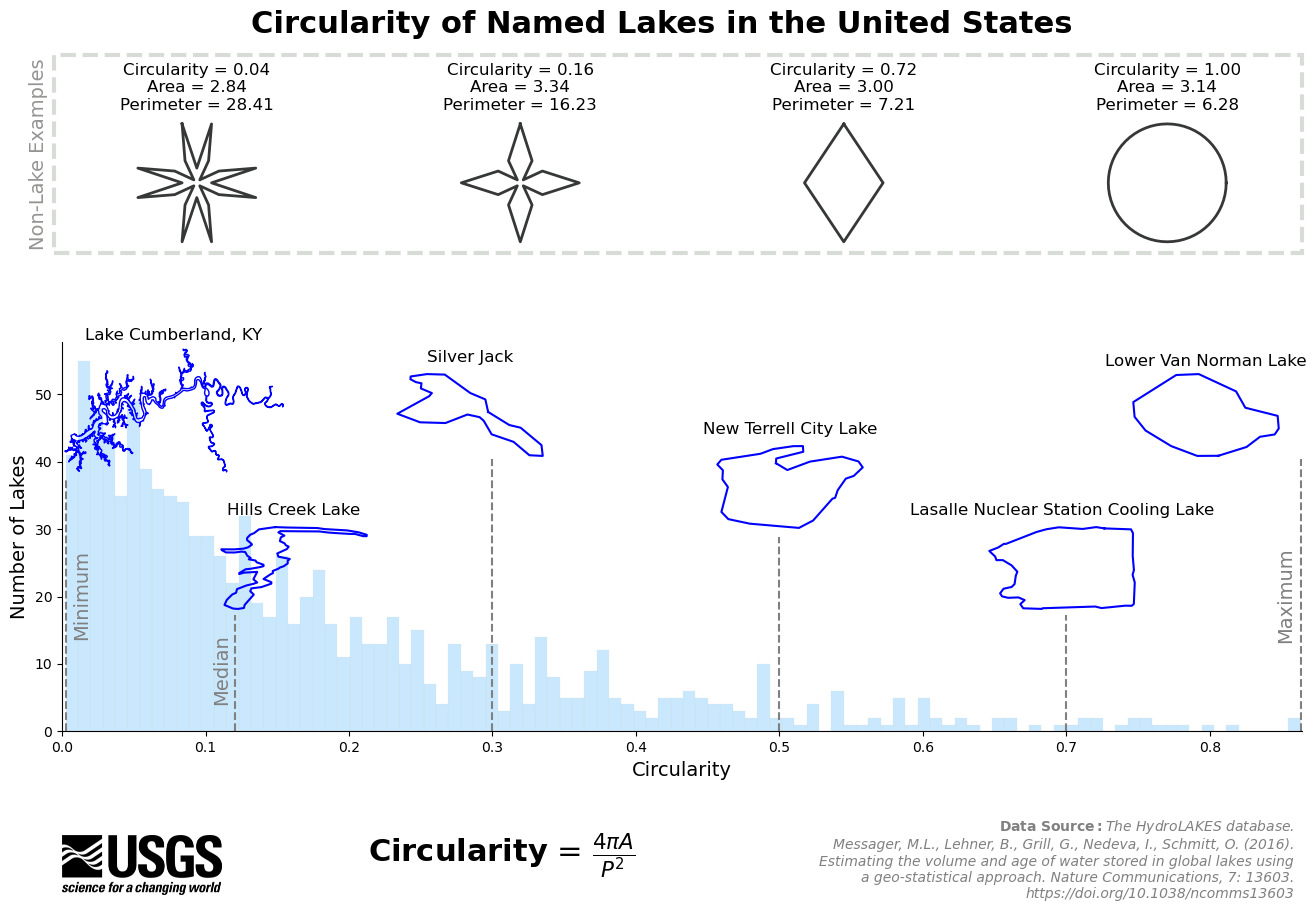

In [35]:
# create final figure
fig = plt.figure(figsize=(16, 9), constrained_layout=False)
gs = GridSpec(4, 4, height_ratios=[3, 0.5, 9, 1], hspace=0.25)
# set up row of shape figures along top
ax = dict()
for i in range(4):
    ax[i] = fig.add_subplot(gs[0, i])
# axes for the thin arrow
ax2 = fig.add_subplot(gs[1, :])
# set up big plot for the circularity distribution in middle
ax5 = fig.add_subplot(gs[2, :])
# set up small plot for logo on bottom left
ax6 = fig.add_subplot(gs[3, 0])
# set up small plot for references text on bottom right
ax7 = fig.add_subplot(gs[3, 3])
# axes for equation
axeq = fig.add_subplot(gs[3, 1])

# plot the shapes
# plot the circle
x, y = circle.exterior.xy
ax[3].plot(x, y, color="xkcd:dark gray", linewidth=2)
ax[3].set_title(f"Circularity = 1.00\nArea = {circle.area:.2f}\nPerimeter = {circle.length:.2f}")
ax[3].set_aspect("equal")
# plot the diamond
x, y = diamond.exterior.xy
ax[2].plot(x, y, color="xkcd:dark gray", linewidth=2)
diamond_circularity = 4 * np.pi * diamond.area / diamond.length**2
ax[2].set_title(f"Circularity = {diamond_circularity:.2f}\nArea = {diamond.area:.2f}\nPerimeter = {diamond.length:.2f}")
ax[2].set_aspect("equal")
# plot the cross
x, y = cross.exterior.xy
ax[1].plot(x, y, color="xkcd:dark gray", linewidth=2)
cross_circularity = 4 * np.pi * cross.area / cross.length**2
ax[1].set_title(f"Circularity = {cross_circularity:.2f}\nArea = {cross.area:.2f}\nPerimeter = {cross.length:.2f}")
ax[1].set_aspect("equal")
# plot the complex shape
x, y = complex.exterior.xy
ax[0].plot(x, y, color="xkcd:dark gray", linewidth=2)
complex_circularity = 4 * np.pi * complex.area / complex.length**2
ax[0].set_title(f"Circularity = {complex_circularity:.2f}\nArea = {complex.area:.2f}\nPerimeter = {complex.length:.2f}")
ax[0].set_aspect("equal")
# remove axes from top row of shape figures
for i in range(4):
    ax[i].set_axis_off()

# add dashed rectangle around those axes
rect = plt.Rectangle((0.12, 0.73), 0.78, 0.22, transform=fig.transFigure,
                     fill=False, edgecolor="xkcd:light gray",
                     linestyle="--", linewidth=3)
fig.patches.extend([rect])
# add text along left side of rectangle
fig.text(0.11, 0.84, "Non-Lake Examples", fontsize=14,
         ha="center", va="center", rotation=90,
         c="xkcd:gray")

# hide middle axes
ax2.set_axis_off()

# plot the circularity distribution of the lakes in the middle
ax5.hist(us_gdf["circularity"], bins=100, color="xkcd:light blue",
         alpha=0.5, edgecolor='xkcd:light gray', linewidth=0.25)
# hide the top and right axes
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)
# plot vertical line at minimum circularity
ax5.axvline(us_gdf["circularity"].min(), color="gray", linestyle="--", ymax=0.65)
# plot vertical line at maximum circularity
ax5.axvline(us_gdf["circularity"].max(), color="gray", linestyle="--", ymax=0.7)
# plot vertical line at median circularity
ax5.axvline(us_gdf["circularity"].median(), color="gray", linestyle="--", ymax=0.3)
# plot vertical line at 0.3 circularity
ax5.axvline(0.3, color="gray", linestyle="--", ymax=0.7)
# plot vertical line at 0.5 circularity
ax5.axvline(0.5, color="gray", linestyle="--", ymax=0.5)
# plot vertical line at 0.7 circularity
ax5.axvline(0.7, color="gray", linestyle="--", ymax=0.3)
# label the axes
ax5.set_xlabel("Circularity", fontsize=14)
ax5.set_ylabel("Number of Lakes", fontsize=14)
# set xlim
ax5.set_xlim(0.0, us_gdf["circularity"].max() + 0.001)

# plot the logo on the bottom left
# get position of the center axes
pos = ax5.get_position()
# move subplot to the bottom left corner
ax6.set_position([pos.bounds[0], 0.0, 0.1, 0.1])
ax6.imshow(logo)
ax6.set_axis_off()

# get position of the logo
pos = ax6.get_position()
# move subplot to the bottom right corner
ax7.set_position([pos.bounds[0] + pos.bounds[2] + 0.67, 0.01, 0.0, 0.0])
# citation text
txt = r"$\bf{Data}$" + " " + r"$\bf{Source:}$" + "The HydroLAKES database.\nMessager, M.L., Lehner, B., Grill, G., Nedeva, I., Schmitt, O. (2016).\nEstimating the volume and age of water stored in global lakes using\na geo-statistical approach. Nature Communications, 7: 13603.\nhttps://doi.org/10.1038/ncomms13603"
# plot the text
ax7.text(0.0, 0.0, txt, fontsize=10, ha='right', va='bottom', color='gray', fontstyle='italic')
ax7.set_axis_off()

# axes for equation in bottom middle
pos = ax7.get_position()
# set subplot to bottom center
axeq.set_position([0.3, pos.bounds[1], 0.2, 0.1])
# add equation
axeq.text(0.5, 0.5, r"$\bf{Circularity}$" + " = " + r"$\frac{4 \pi A}{P^2}$",
          fontsize=22, ha='center', va='center')
axeq.set_axis_off()

# figure title
fig.suptitle("Circularity of Named Lakes in the United States", fontsize=22, fontweight="bold", y=1.0)

# add floating subplot to display the most circular lake
# make new axes
ax8 = fig.add_axes([0.79, 0.5, 0.1, 0.1])
# plot the most circular lake
x, y = most_circular_geom.exterior.xy
ax8.plot(x, y, color="blue", linewidth=1.5)
# add the name of the lake
ax8.set_title(f"{most_circular_name}", y=0.95)
# turn off axes
ax8.set_axis_off()

# add axes for least circular lake
ax9 = fig.add_axes([0.12, 0.48, 0.15, 0.15])
# plot the least circular lake
x, y = least_circular_geom.exterior.xy
ax9.plot(x, y, color="blue", linewidth=1)
# add the name of the lake
ax9.set_title(f"{least_circular_name}, KY", pad=0.1)
# turn off axes
ax9.set_axis_off()

# add axes for the median circular lake
ax10 = fig.add_axes([0.22, 0.33, 0.1, 0.1])
# plot the median circular lake
x, y = median_circular_geom.exterior.xy
ax10.plot(x, y, color="blue", linewidth=1.5)
# add the name of the lake
ax10.set_title(f"{median_circular_name}")
# turn off axes
ax10.set_axis_off()

# add axes for 0.3 circularity
ax11 = fig.add_axes([0.33, 0.5, 0.1, 0.1])
# plot the 0.3 circular lake
x, y = geom03.exterior.xy
ax11.plot(x, y, color="blue", linewidth=1.5)
# add the name of the lake
ax11.set_title(f"{name03}")
# turn off axes
ax11.set_axis_off()

# add axes for 0.5 circularity
ax12 = fig.add_axes([0.53, 0.42, 0.1, 0.1])
# plot the 0.5 circular lake
x, y = geom05.exterior.xy
ax12.plot(x, y, color="blue", linewidth=1.5)
# add the name of the lake
ax12.set_title(f"{name05}")
# turn off axes
ax12.set_axis_off()

# add axes for 0.7 circularity
ax13 = fig.add_axes([0.7, 0.33, 0.1, 0.1])
# plot the 0.7 circular lake
x, y = geom07.exterior.xy
ax13.plot(x, y, color="blue", linewidth=1.5)
# add the name of the lake
ax13.set_title(f"{name07}, IL")
# turn off axes
ax13.set_axis_off()

# vertical text labeling min
fig.text(0.137, 0.35, "Minimum", fontsize=14,
            ha="center", va="center", rotation=90,
            c="gray")
# vertical text labeling max
fig.text(0.89, 0.35, "Maximum", fontsize=14,
            ha="center", va="center", rotation=90, 
            c="gray") 
# vertical text labeling median
fig.text(0.225, 0.267, "Median", fontsize=14,
            ha="center", va="center", rotation=90,
            c="gray")

# save the figure
fig.savefig('out/20230411_circular_jhariharan.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()

## Supporting information

### Key takeaways of this viz

1. Most named lakes in the US are not very circular.

### Data source(s)

The HydroLAKES database.

Messager, M.L., Lehner, B., Grill, G., Nedeva, I., Schmitt, O. (2016). Estimating the volume and age of water stored in global lakes using a geo-statistical approach. Nature Communications, 7: 13603. https://doi.org/10.1038/ncomms13603